In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("S:\\AI\\Demo-1 Neural Network\\Churn_Modelling.csv")

In [3]:
df=data

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Allocating values to male and female 

In [9]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df['gender']=df.Gender.map({'Make':1, 'Female':0})

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'gender'],
      dtype='object')

In [12]:
df1=df.drop("Gender", axis=1)

In [13]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,0.0
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.0
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,0.0
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0.0
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0.0


### EDA

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'gender'],
      dtype='object')

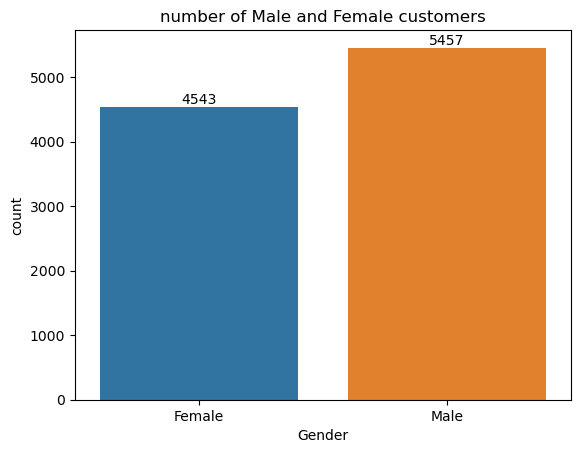

In [15]:
ax=sns.countplot(x="Gender", data=df)
plt.title("number of Male and Female customers")
plt.xlabel('Gender')
plt.ylabel('count')

for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
gen=df.Gender.value_counts()
gen

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
score=df.groupby("Gender", as_index=False)['CreditScore'].sum()

In [18]:
score

,Gender,CreditScore
0,Female,2956727
1,Male,3548561


In [19]:
gender=pd.DataFrame({'Gender':gen.index, 'Count':gen.values})

cred_scor=pd.DataFrame(score)

In [20]:
gender

,Gender,Count
0,Male,5457
1,Female,4543


In [21]:
cred_scor

,Gender,CreditScore
0,Female,2956727
1,Male,3548561


In [22]:
df3= pd.merge(gender,cred_scor, on='Gender', how='inner')
df3

,Gender,Count,CreditScore
0,Male,5457,3548561
1,Female,4543,2956727


In [23]:
df['CreditScore'] = df['CreditScore'].astype(int, errors='ignore')
df['CreditScore'] = df['CreditScore'].astype(int, errors='ignore')

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       2 non-null      object
 1   Count        2 non-null      int64 
 2   CreditScore  2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 64.0+ bytes


In [25]:
df3['cred_per_capita'] = df3['CreditScore'] / df3['Count']


In [26]:
df3

,Gender,Count,CreditScore,cred_per_capita
0,Male,5457,3548561,650.276892
1,Female,4543,2956727,650.831389


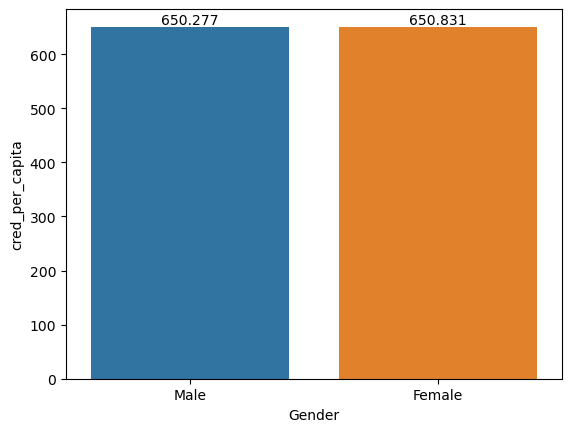

In [27]:
ax=sns.barplot(x="Gender", y='cred_per_capita', data =df3)

for bars in ax.containers:
    ax.bar_label(bars)

In [28]:
def agr_group (age):
    if age<= 17:
        return '0-17'
    elif age<=25:
        return '18-25'
    elif age<=35:
        return '26-35'
    elif age<=45:
        return '36-45'
    elif age<=50:
        return '46-50'
    elif age<=55:
        return '51-55'
    else:
        return '+55'


In [29]:
df1['age_grp']=df.Age.apply(agr_group)
df['age_grp']=df.Age.apply(agr_group)

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender,age_grp
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.0,36-45
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,36-45
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.0,36-45
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.0,36-45
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,36-45


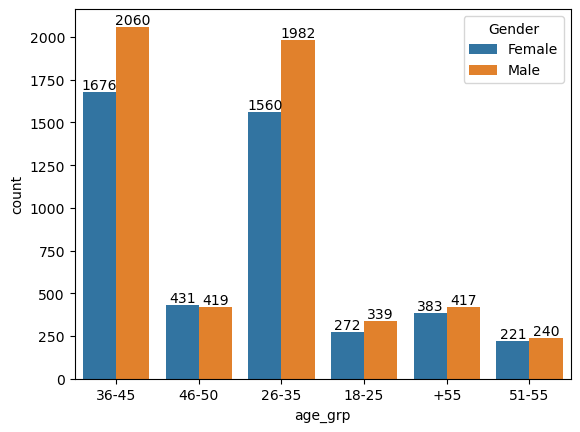

In [31]:
ax=sns.countplot(x='age_grp', hue='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)


### Balance per capita 

In [32]:
ax=df.groupby(['Gender'], as_index=False)['Balance'].sum().sort_values(by='Balance', ascending=True)

In [33]:
ax

,Gender,Balance
0,Female,3.437205e+08
1,Male,4.211384e+08


In [34]:
df3=pd.merge(df3,ax, on="Gender", how='inner')

In [35]:
df3

,Gender,Count,CreditScore,cred_per_capita,Balance
0,Male,5457,3548561,650.276892,4.211384e+08
1,Female,4543,2956727,650.831389,3.437205e+08


In [36]:
df3['bal_per_capita']=df3.Balance/df3.Count

In [37]:
df3

,Gender,Count,CreditScore,cred_per_capita,Balance,bal_per_capita
0,Male,5457,3548561,650.276892,4.211384e+08,77173.974506
1,Female,4543,2956727,650.831389,3.437205e+08,75659.369139


([<matplotlib.patches.Wedge at 0x259c3aff910>,
 [Text(-0.17415702590863627, 1.0861258354015242, 'Male'),
  Text(0.17415702590863635, -1.0861258354015242, 'Female')])

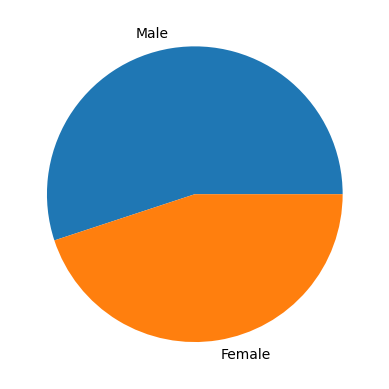

In [38]:
plt.pie(df3['Balance'], labels=df3['Gender'])

([<matplotlib.patches.Wedge at 0x259c3b41f00>,
 [Text(-0.017122949444238963, 1.099866721290507, 'Male'),
  Text(0.017122949444239075, -1.099866721290507, 'Female')])

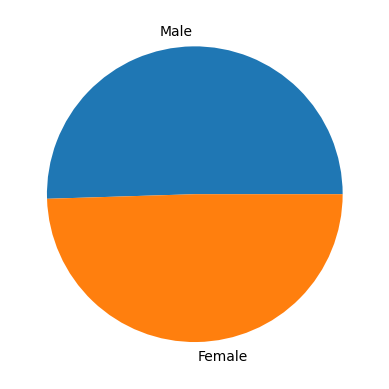

In [39]:
plt.pie(df3['bal_per_capita'], labels=df3['Gender'])

### Salary per capita 

In [40]:
ax=df.groupby(['Gender'], as_index=False)['EstimatedSalary'].sum().sort_values(by='EstimatedSalary', ascending=False)

In [41]:
ax

,Gender,EstimatedSalary
1,Male,5.438696e+08
0,Female,4.570328e+08


In [42]:
df3=pd.merge(df3,ax, on='Gender', how='inner')

In [43]:
df3['sal_per_capita']=df3.EstimatedSalary/df3.Count

([<matplotlib.patches.Wedge at 0x259c3ce08e0>,
 [Text(0.008083979767132356, 1.099970294722146, 'Male'),
  Text(-0.008084185740435361, -1.099970293208373, 'Female')])

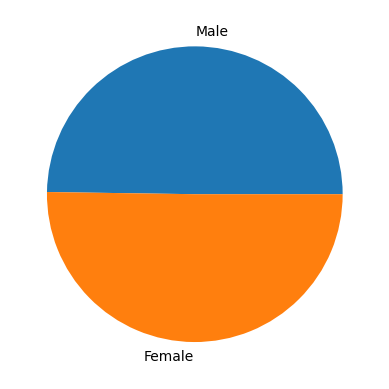

In [44]:
plt.pie(df3['sal_per_capita'], labels=df3['Gender'])

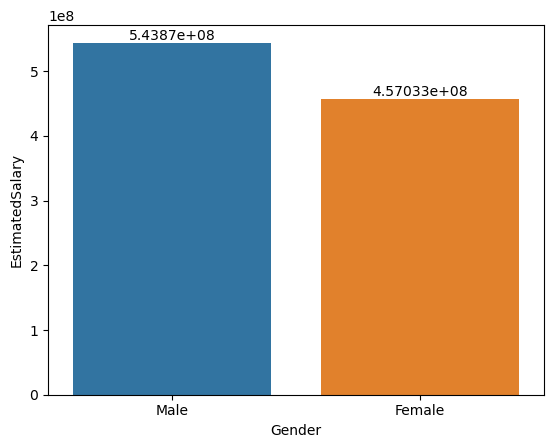

In [45]:
ax=sns.barplot(x='Gender', y='EstimatedSalary', data=df3)

for bars in ax.containers:
    ax.bar_label(bars)

### Credit Card and Credit score

In [46]:
ax=df.groupby(['Gender'], as_index=False)['HasCrCard'].sum()
ax

,Gender,HasCrCard
0,Female,3192
1,Male,3863


In [47]:
df3=pd.merge(df3,ax, on='Gender',how='inner')

In [48]:
df3['cr_card_per_capita']=df3.HasCrCard/df3.Count

In [49]:
df3

,Gender,Count,CreditScore,cred_per_capita,Balance,bal_per_capita,EstimatedSalary,sal_per_capita,HasCrCard,cr_card_per_capita
0,Male,5457,3548561,650.276892,4.211384e+08,77173.974506,5.438696e+08,99664.576931,3863,0.707898
1,Female,4543,2956727,650.831389,3.437205e+08,75659.369139,4.570328e+08,100601.541382,3192,0.702619


In [50]:
df3["cr_percentage"]=(abs(df3.HasCrCard)/df3.Count)*100
df3

,Gender,Count,CreditScore,cred_per_capita,Balance,bal_per_capita,EstimatedSalary,sal_per_capita,HasCrCard,cr_card_per_capita,cr_percentage
0,Male,5457,3548561,650.276892,4.211384e+08,77173.974506,5.438696e+08,99664.576931,3863,0.707898,70.789811
1,Female,4543,2956727,650.831389,3.437205e+08,75659.369139,4.570328e+08,100601.541382,3192,0.702619,70.261941


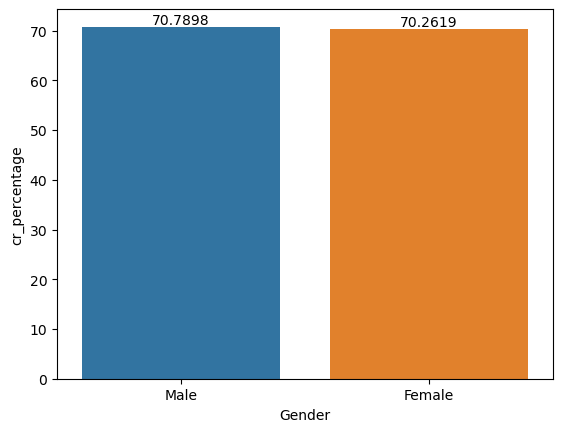

In [51]:
ax=sns.barplot(x='Gender',y='cr_percentage',data=df3)

for bars in ax.containers:
    ax.bar_label(bars)

In [52]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'gender', 'age_grp'],
      dtype='object')

In [53]:
         ax=df.groupby('Gender', as_index=False)['CreditScore'].sum()

In [54]:
ax

,Gender,CreditScore
0,Female,2956727
1,Male,3548561


In [55]:
df3=pd.merge(df3,ax, on='Gender', how='inner')
df3

,Gender,Count,CreditScore_x,cred_per_capita,Balance,bal_per_capita,EstimatedSalary,sal_per_capita,HasCrCard,cr_card_per_capita,cr_percentage,CreditScore_y
0,Male,5457,3548561,650.276892,4.211384e+08,77173.974506,5.438696e+08,99664.576931,3863,0.707898,70.789811,3548561
1,Female,4543,2956727,650.831389,3.437205e+08,75659.369139,4.570328e+08,100601.541382,3192,0.702619,70.261941,2956727


In [56]:
df3['cr_score_per_capita']=df3.CreditScore_y/df3.Count
df3

,Gender,Count,CreditScore_x,cred_per_capita,Balance,bal_per_capita,EstimatedSalary,sal_per_capita,HasCrCard,cr_card_per_capita,cr_percentage,CreditScore_y,cr_score_per_capita
0,Male,5457,3548561,650.276892,4.211384e+08,77173.974506,5.438696e+08,99664.576931,3863,0.707898,70.789811,3548561,650.276892
1,Female,4543,2956727,650.831389,3.437205e+08,75659.369139,4.570328e+08,100601.541382,3192,0.702619,70.261941,2956727,650.831389


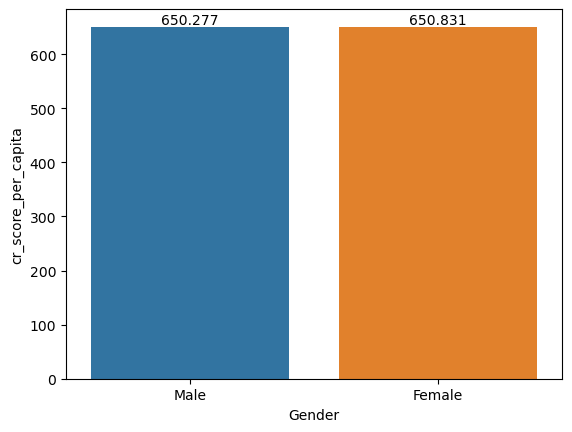

In [57]:
ax=sns.barplot(y='cr_score_per_capita', x='Gender', data=df3)
for bars in ax.containers:
    ax.bar_label(bars)

### Regional difference if any


In [58]:
ax = df.Geography.value_counts()

In [59]:
ax

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [60]:
ax=df.groupby(['Geography'], as_index=False)['Gender'].value_counts()

In [61]:
ax

,Geography,Gender,count
0,France,Male,2753
1,France,Female,2261
2,Germany,Male,1316
3,Germany,Female,1193
4,Spain,Male,1388
5,Spain,Female,1089


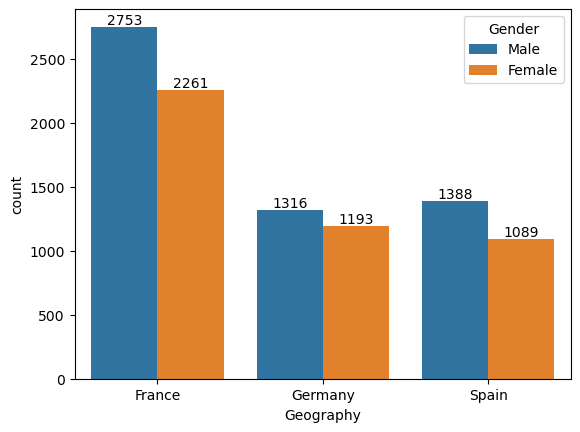

In [62]:
bx=sns.barplot(x='Geography',y='count',hue='Gender', data=ax)

for bars in bx.containers:
    bx.bar_label(bars)

### Exitted or not

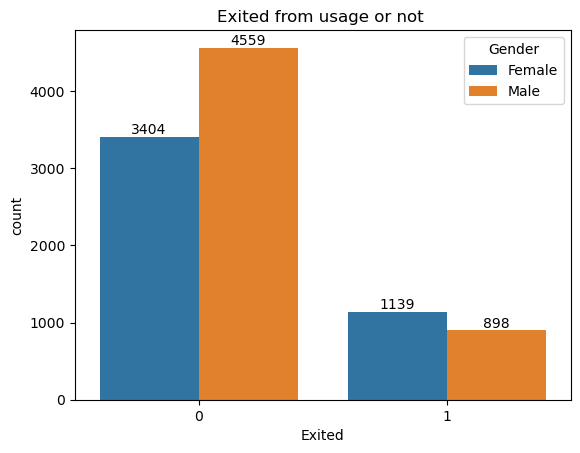

In [119]:
ax=sns.countplot(x='Exited',hue='Gender', data=df)
plt.title('Exited from usage or not ')

for bars in ax.containers:
    ax.bar_label(bars)

### Based on the EDA we can conclude the following things- 

In [64]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender,age_grp
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,0.0,36-45
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.0,36-45
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,0.0,36-45
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0.0,36-45
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0.0,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,39,5,0.00,2,1,0,96270.64,0,NaN,36-45
9996,9997,15569892,Johnstone,516,France,35,10,57369.61,1,1,1,101699.77,0,NaN,26-35
9997,9998,15584532,Liu,709,France,36,7,0.00,1,0,1,42085.58,1,0.0,36-45
9998,9999,15682355,Sabbatini,772,Germany,42,3,75075.31,2,1,0,92888.52,1,NaN,36-45


In [65]:
df1.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [66]:
df1.Geography=df1.Geography.map({'France':0, 'Spain':1, 'Germany':0})
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender,age_grp
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,36-45
1,2,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0.0,36-45
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,36-45
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,36-45
4,5,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0.0,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,39,5,0.00,2,1,0,96270.64,0,NaN,36-45
9996,9997,15569892,Johnstone,516,0,35,10,57369.61,1,1,1,101699.77,0,NaN,26-35
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,0.0,36-45
9998,9999,15682355,Sabbatini,772,0,42,3,75075.31,2,1,0,92888.52,1,NaN,36-45


In [67]:
df1.gender.unique()

array([ 0., nan])

due to an error in the programme above the value of male is Nan, we will correct it

In [68]:
df1.gender.replace(np.nan,1, inplace=True)

In [69]:
df1.gender.unique()

array([0., 1.])

In [70]:
df.gender.replace(np.nan,1, inplace=True)

In [71]:
df1.drop(columns=['RowNumber','Surname'], axis=1, inplace=True)

In [72]:
df1

,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender,age_grp
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,36-45
1,15647311,608,1,41,1,83807.86,1,0,1,112542.58,0,0.0,36-45
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,36-45
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,36-45
4,15737888,850,1,43,2,125510.82,1,1,1,79084.10,0,0.0,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,39,5,0.00,2,1,0,96270.64,0,1.0,36-45
9996,15569892,516,0,35,10,57369.61,1,1,1,101699.77,0,1.0,26-35
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,1,0.0,36-45
9998,15682355,772,0,42,3,75075.31,2,1,0,92888.52,1,1.0,36-45


In [73]:
df4=df1.drop(columns=['CustomerId'], axis=1)
df4

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender,age_grp
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,36-45
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0.0,36-45
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,36-45
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,36-45
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0.0,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1.0,36-45
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1.0,26-35
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0.0,36-45
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,1.0,36-45


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Geography'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>,
        <Axes: title={'center': 'gender'}>, <Axes: >]], dtype=object)

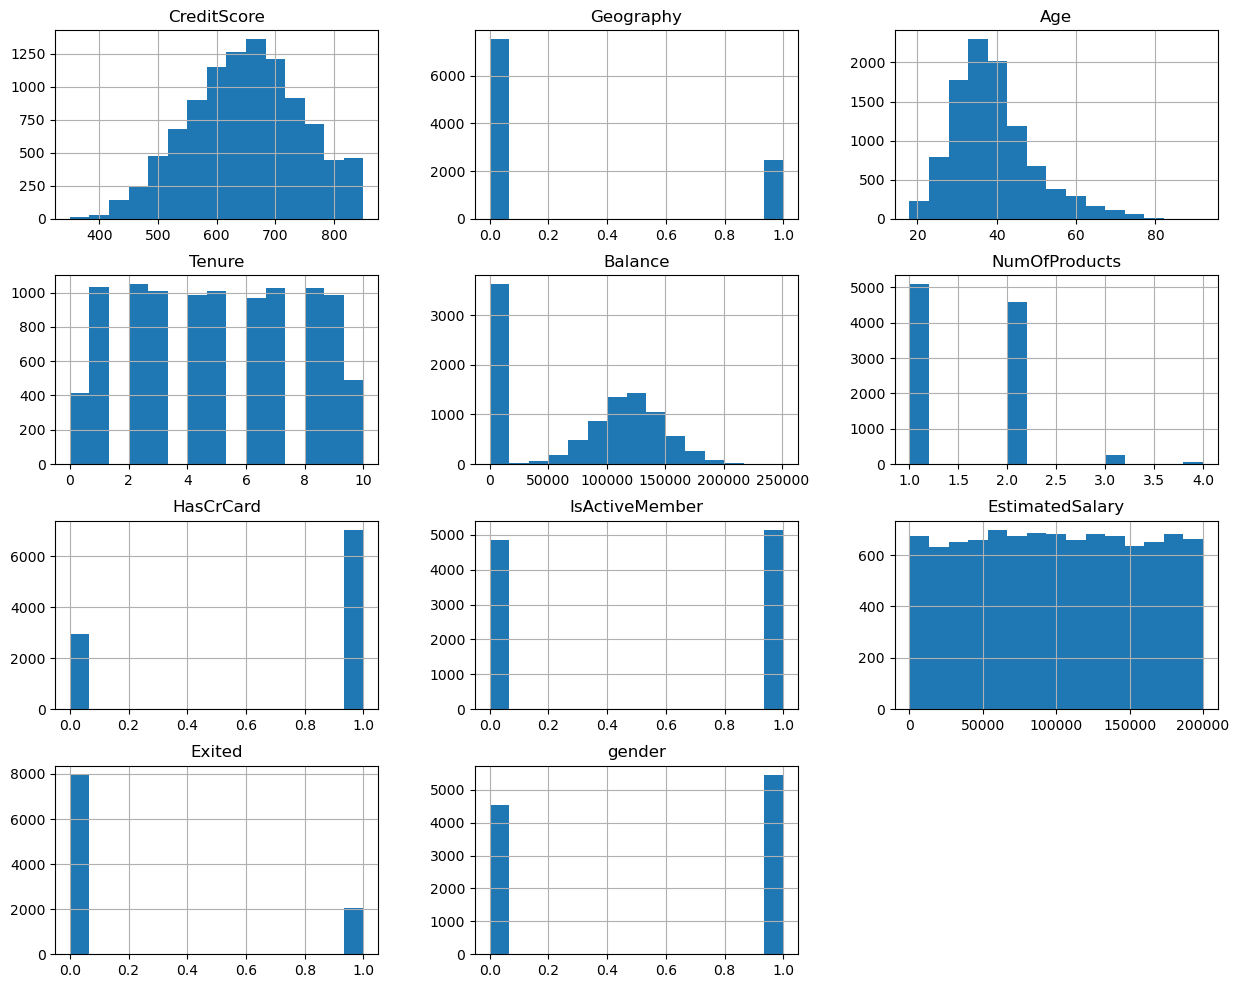

In [74]:
df4.hist(figsize=(15,12), bins=15)

C:\Users\prati\AppData\Local\Temp\ipykernel_25284\1432173762.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(), annot=True)


<Axes: >

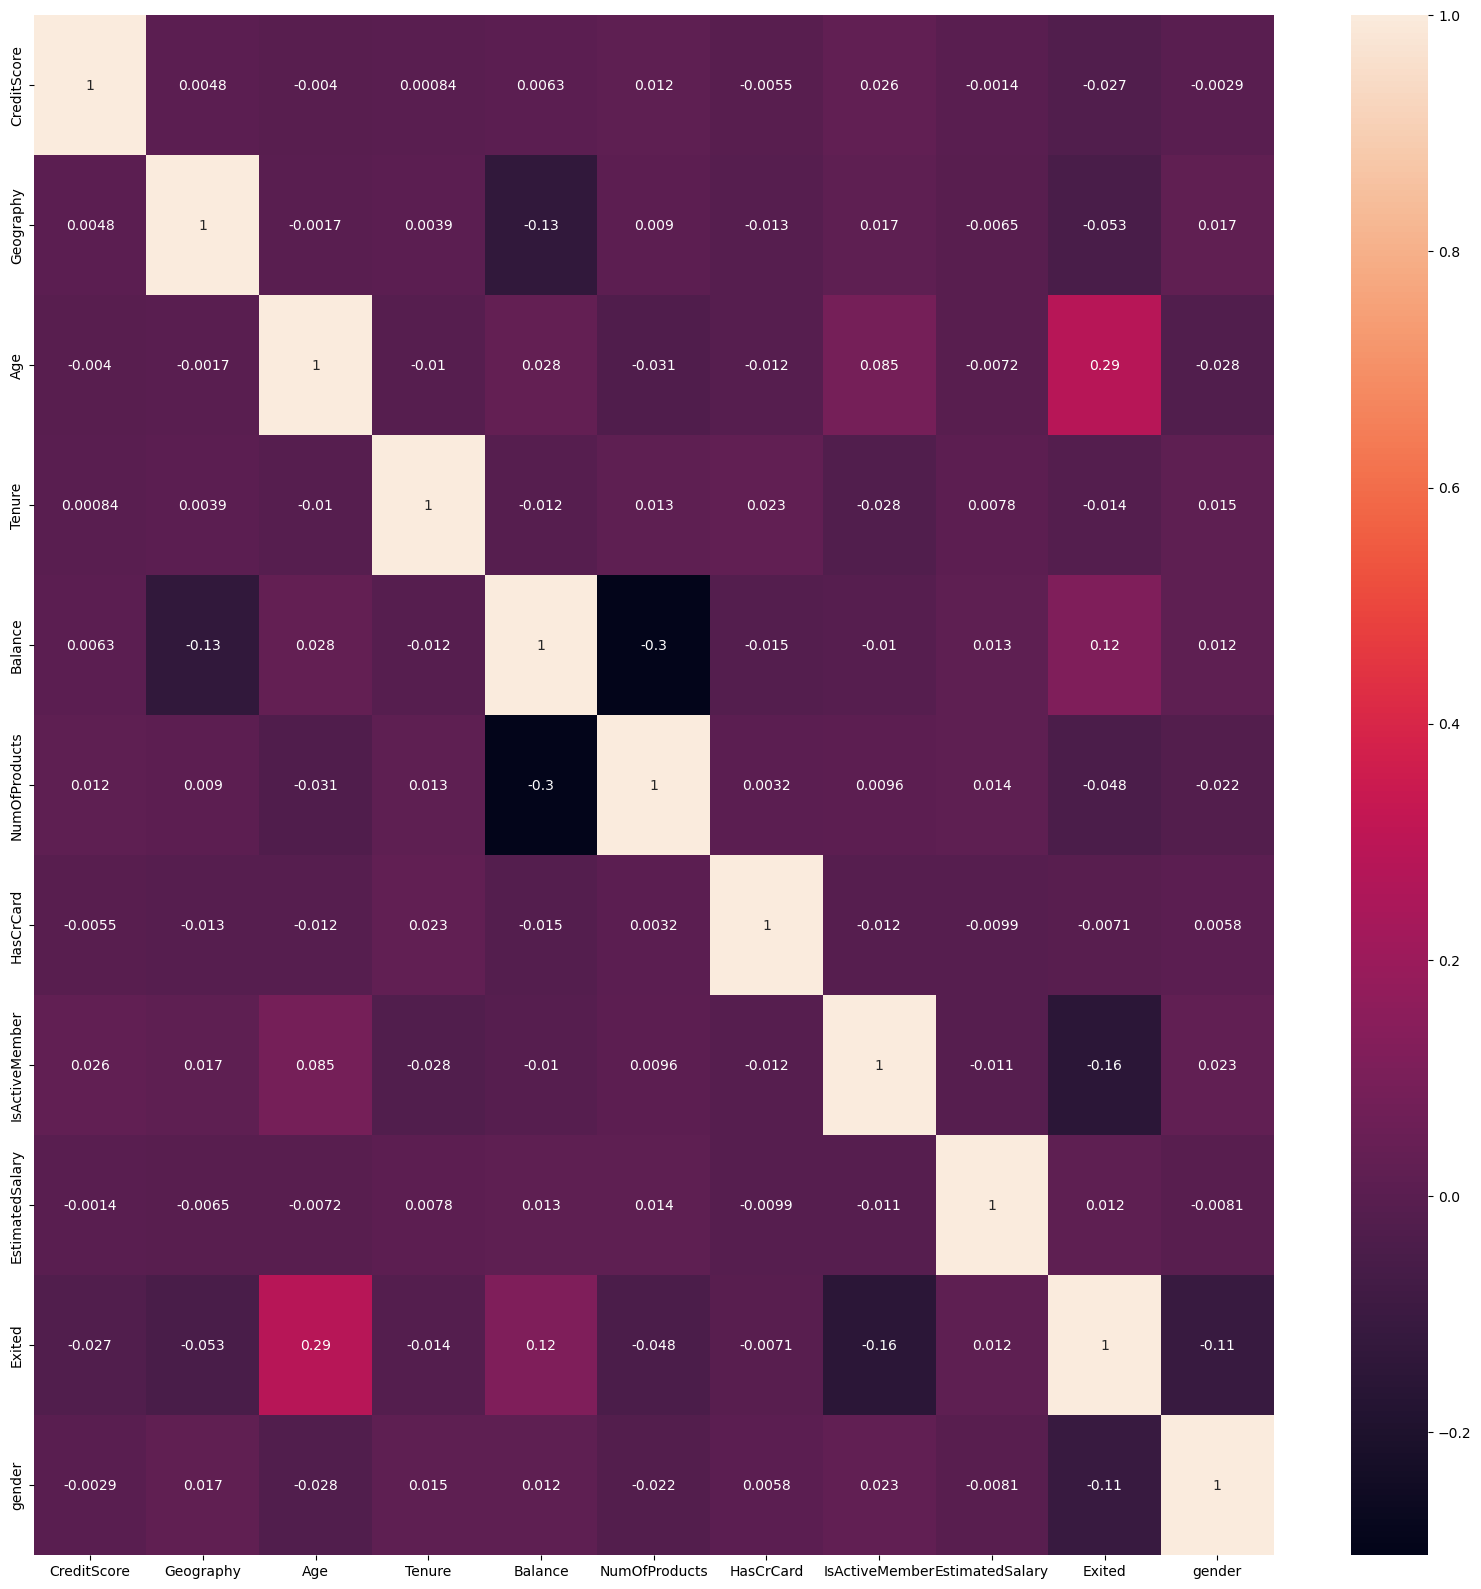

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(), annot=True)


In [76]:
x=df4.drop(['Exited','age_grp'],axis=1)
y=df4.Exited

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc=StandardScaler()

In [81]:
x_train= sc.fit_transform(x_train)

In [82]:
x_test=sc.fit_transform(x_test)

In [83]:
from keras.models import Sequential
from keras.layers import Dense

In [88]:
classifier = Sequential()

classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=10))  # input
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))  # middle layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))  # output

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(x_train, y_train, batch_size=10, epochs=100, verbose=0)


In [89]:
score, acc = classifier.evaluate(x_train, y_train, verbose=1)

print('Test score:', score)
print('Test accuracy:', acc)

219/219 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8309
Test score: 0.409165620803833
Test accuracy: 0.8308571577072144


In [105]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

94/94 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [90]:
from sklearn.metrics import confusion_matrix

In [104]:
cm=confusion_matrix(y_test,y_pred)

In [106]:
cm

array([[2355,   61],
       [ 410,  174]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

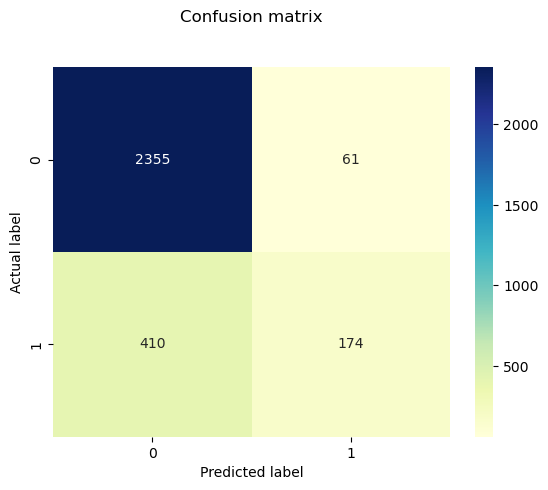

In [107]:
#Evaluation Metrics
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [108]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2416
           1       0.74      0.30      0.42       584

    accuracy                           0.84      3000
   macro avg       0.80      0.64      0.67      3000
weighted avg       0.83      0.84      0.81      3000



In [113]:
df4.head(3)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender,age_grp
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,36-45
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0.0,36-45
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,36-45


In [117]:
new_data = [[619, 2, 33, 4, 500,1,1,1,121348.88,1]]

prediction = classifier.predict(new_data)

print(prediction)    #this person is likely to opt out of the card service

1/1 [==============================] - 0s 42ms/step
[[0.]]
